# Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook 
%matplotlib inline

In [3]:
# Define the folder path as a string
path = r'/Users/pamnouboussi/22.06.23 Achiev 6'

In [5]:
# Read the CSV file into a DataFrame and set the index column
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'real_estate.csv'), index_col=0)

## 2. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [10]:
df.shape

(414, 7)

In [11]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

In [17]:
df.head()

,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
# Check for missing values

df.isnull().sum()

Date              0
House age         0
D. metro          0
N. shops          0
Latitude          0
Longitude         0
Price per unit    0
dtype: int64

In [14]:
# CHeck for duplicates
dups = df.duplicated()
dups.shape # No dups

(414,)

#### Extreme values check

/Users/pamnouboussi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price per unit', ylabel='Density'>

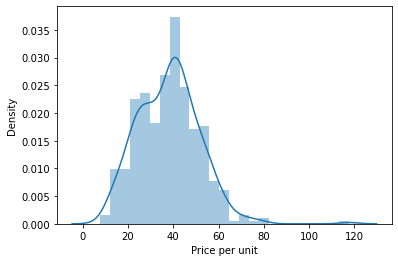

In [15]:
sns.distplot(df['Price per unit'], bins=25) # Shows extreme values


In [16]:
#Check values 
df['Price per unit'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Price per unit, dtype: float64

## 3. Data prep for Regression Analysis

### Hypothesis: House age has an impact on the price per unit.

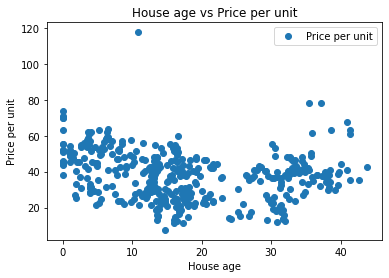

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'House age', y='Price per unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('House age vs Price per unit')  
plt.xlabel('House age')  
plt.ylabel('Price per unit')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['House age'].values.reshape(-1,1)
y = df['Price per unit'].values.reshape(-1,1)

In [20]:
X

array([[32. ],
       [19.5],
       [13.3],
       [13.3],
       [ 5. ],
       [ 7.1],
       [34.5],
       [20.3],
       [31.7],
       [17.9],
       [34.8],
       [ 6.3],
       [13. ],
       [20.4],
       [13.2],
       [35.7],
       [ 0. ],
       [17.7],
       [16.9],
       [ 1.5],
       [ 4.5],
       [10.5],
       [14.7],
       [10.1],
       [39.6],
       [29.3],
       [ 3.1],
       [10.4],
       [19.2],
       [ 7.1],
       [25.9],
       [29.6],
       [37.9],
       [16.5],
       [15.4],
       [13.9],
       [14.7],
       [12. ],
       [ 3.1],
       [16.2],
       [13.6],
       [16.8],
       [36.1],
       [34.4],
       [ 2.7],
       [36.6],
       [21.7],
       [35.9],
       [24.2],
       [29.4],
       [21.7],
       [31.3],
       [32.1],
       [13.3],
       [16.1],
       [31.7],
       [33.6],
       [ 3.5],
       [30.3],
       [13.3],
       [11. ],
       [ 5.3],
       [17.2],
       [ 2.6],
       [17.5],
       [40.1],
       [ 1

In [21]:
y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [23]:
# Create a regression object.
# This is the regression object, which will be fit onto the training set.
regression = LinearRegression()  

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

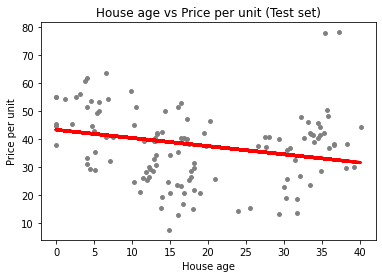

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('House age vs Price per unit (Test set)')
plot_test.xlabel('House age')
plot_test.ylabel('Price per unit')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.29214369]]
Mean squared error:  170.4385482030937
R2 score:  -8.405027617275351e-05


### Interpretation:
- slope: represents the estimated change in the dependent variable (price per unit) for a one-unit change in the independent variable. it suggest that suggests that on average, for each additional unit of house age, the price per unit decreases by approximately 0.29214369 units.
- Mean squared error: A lower MSE value indicates a better fit of the model to the data. In this case, the MSE of 170.4385482030937 suggests that there is a relatively large amount of variability in the data that is not accounted for by the linear regression model.
- R2 Score: the linear regression model does not explain much of the variability in the price per unit based on house age.

Overall, the results suggest that the relationship between house age and price per unit, as captured by the linear regression model, is weak or non-existent. There could be other factors influencing the price per unit.

In [29]:
y_predicted

array([[40.39480223],
       [36.39243365],
       [33.32492489],
       [35.92500375],
       [39.1970131 ],
       [32.71142314],
       [32.94513809],
       [33.23728178],
       [40.33637349],
       [38.37901076],
       [39.51837116],
       [39.51837116],
       [39.69365737],
       [33.47099674],
       [42.06002128],
       [32.91592372],
       [33.8799979 ],
       [43.40388226],
       [39.60601426],
       [33.23728178],
       [41.73866321],
       [39.89815796],
       [34.6395715 ],
       [38.70036882],
       [42.79038051],
       [39.02172688],
       [38.08686707],
       [34.52271403],
       [41.82630632],
       [40.39480223],
       [42.20609312],
       [38.11608144],
       [43.40388226],
       [32.97435246],
       [38.23293891],
       [39.83972922],
       [33.70471169],
       [41.91394943],
       [41.41730515],
       [38.14529581],
       [43.40388226],
       [32.24399323],
       [38.75879756],
       [33.96764101],
       [38.5250826 ],
       [41

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,45.3,40.394802
1,14.4,36.392434
2,46.0,33.324925
3,15.6,35.925004
4,50.2,39.197013
5,38.1,32.711423
6,48.5,32.945138
7,41.4,33.237282
8,51.6,40.336373
9,40.1,38.379011


#### Compare how the regression fits the training set

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.29214369]]
Mean squared error:  179.51785191225105
R2 score:  0.05738473442471026


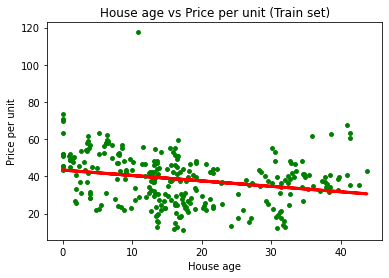

In [35]:
#Visualise training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('House age vs Price per unit (Train set)')
plot_test.xlabel('House age')
plot_test.ylabel('Price per unit')
plot_test.show()

## Reflections:

- The slope values are consistent between the training and test sets, indicating that the estimated change in the price per unit for a one-unit change in house age remains the same in both sets.

- The MSE on the test set is slightly lower than the training set, suggesting the model performs slightly better on the test set though the diferences are not substancial. 

- Overall, the model's performance is not very strong, as indicated by the low R2 scores and relatively high mean squared errors. These results suggest that the linear regression model, based solely on house age, does not provide a good fit for predicting the price per unit accurately. My hypothesis would thus be rejected

## Impacts of possible data bias
Sampling and selection and measurment bias where certain types of houses or neighborhoods are overrepresented or underrepresented or errors/inaccuracies in the measurement or recording of the variables can introduce a bias in the model's estimation. This bias can affect the slope, mean squared error, and R2 score.

# Bonus Task
### - Performance afetr removing outliers

In [36]:
# Clean the extreme values from the "Price per Unit" 
df_test = df[df['Price per unit'] <=100] 

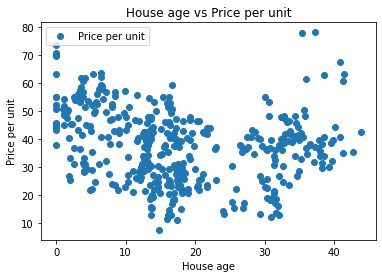

In [40]:
# Scatterplost to visulaise data without outliers

df_test.plot(x = 'House age', y='Price per unit', style='o')  
plt.title('House age vs Price per unit')  
plt.xlabel('House age')  
plt.ylabel('Price per unit')  
plt.show()

In [41]:
# Reshape again.

X_2 = df_test['House age'].values.reshape(-1,1)
y_2 = df_test['Price per unit'].values.reshape(-1,1)

In [42]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [43]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [44]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [45]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.24227051]]
Mean squared error:  159.1010495041098
R2 score:  0.030733312346075903


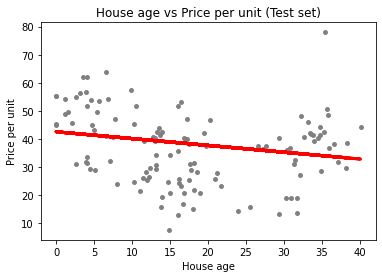

In [47]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('House age vs Price per unit (Test set)')
plot_test.xlabel('House age')
plot_test.ylabel('Price per unit')
plot_test.show()

In [48]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,56.8,41.600560
1,14.4,36.730923
2,33.4,41.576333
3,15.6,36.343290
4,30.9,34.962348
5,31.9,33.557179
6,48.5,33.872131
7,41.4,34.114402
8,51.6,40.001575
9,28.8,38.257227
